# Inference 

This notebook is meant to show in an accessible way how to perform inference using the trained model. 
The model used here is just an example trained for 1 epoch.

In [1]:
import zarr
import matplotlib.pyplot as plt

from inference import inference
from src.utils.utils import get_device

In [2]:
ckpt_path = 'trained_models/GAN_Gen_ok_in-focus-centre_WGANGP_advT_True_LReLU_0.05_3D__2_DNA-cell_membrane-mitochondria-nuclear_envelope-myofibrils-nucleoli.tar'
output_dir = 'output_images/'
device = get_device(0)
output_format = 'tiff'
img_path = '/mnt/organvision_nvme/denoised_hipsc_single_cell_dataset/TOMM20/1000.zarr'
source = 3

_CudaDeviceProperties(name='NVIDIA GeForce RTX 3090', major=8, minor=6, total_memory=24256MB, multi_processor_count=82)


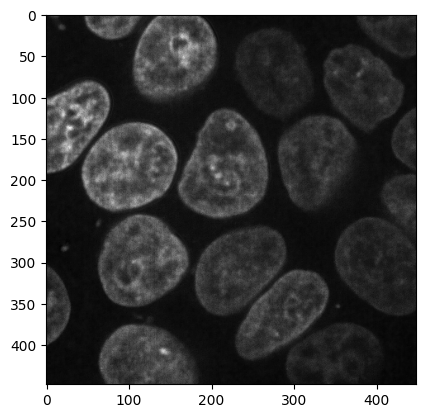

In [3]:
img = zarr.open(img_path)
section = ((16,64,64),(32,512,512))
plt.imshow(img[2, 
            (section[0][0]+section[1][0])//2, #central slice
            section[0][1]:section[1][1],
            section[0][2]:section[1][2]
            ], cmap = 'gray') # original image

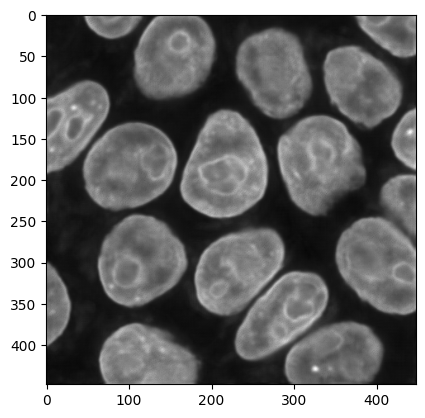

In [4]:
output_img = inference(img_path, ckpt_path, output_dir+'0', output_format, section, source, device)
plt.imshow(output_img[0,8].cpu().numpy(), cmap='gray') #prediction